# peewee in depth Sqlite

## Database

class Database(database[, thread_safe=True[, autorollback=False[, field_types=None[, opera- tions=None[, autoconnect=True[, **kwargs]]]]]])<br><br>

Parameters<br>
• database(str)– Database name or filename for SQLite (or None to defer initialization, in which case you must call Database.init(), specifying the database name).<br>
• thread_safe (bool) – Whether to store connection state in a thread-local.<br>
• autorollback (bool) – Automatically rollback queries that fail when not in an explicit
transaction.<br>
• field_types (dict) – A mapping of additional field types to support.<br>
• operations (dict) – A mapping of additional operations to support.<br>
• autoconnect (bool) – Automatically connect to database if attempting to execute a query on a closed database.<br>
• kwargs – Arbitrary keyword arguments that will be passed to the database driver when a connection is created, for example password, host, etc.<br><br>

The Database is responsible for: • Executing queries
• Managing connections
• Transactions
• Introspection


In [11]:

from peewee import Database, Model
from peewee import CharField, DateField, IntegerField

db = Database(database='database', autoconnect=True, thread_safe=True)

class Student(Model):
    """Simple model of a student"""
    id = IntegerField(column_name='id')
    name = CharField(max_length=255)
    birthdate = DateField(formats='MM/DD/YYYY')
    university = CharField(max_length=255)
    
    class Meta:
        """Metadata of person model"""
        database = db
    

## Database Functions

param = '?'<br>
String used as parameter placeholder in SQL queries.

In [12]:
print(db.param)
db.param = 'X'
print(db.param)

?
X


quote = '"'<br>
Type of quotation-mark to use to denote entities such as tables or columns.

In [13]:
print(db.quote)

""


init(database[, **kwargs ])<br><br>

Parameters<br>
• database (str) – Database name or filename for SQLite.<br>
• kwargs – Arbitrary keyword arguments that will be passed to the database driver when a
connection is created, for example password, host, etc.<br>
Initialize a deferred database. See Run-time database configuration for more info.

In [14]:
db.init(database='database', user='root', password='Fennec!200', host='local')

\__enter\__()<br>
The Database instance can be used as a context-manager, in which case a connection will be held open for the duration of the wrapped block.
Additionally, any SQL executed within the wrapped block will be executed in a transaction.

In [15]:
print(db.__enter__)

<bound method Database.__enter__ of <peewee.Database object at 0x7fa85c363dd0>>


connection_context()<br>
Create a context-manager that will hold open a connection for the duration of the wrapped block.

In [16]:
db.connection_context()

connect([reuse_if_open=False ])<br><br>
Parameters<br>
reuse_if_open (bool) – Do not raise an exception if a connection is already opened.<br><br>

Returns whether a new connection was opened.

In [17]:
print(db.connect(reuse_if_open=True))

NotImplementedError: 

close()<br>
Returns Whether a connection was closed. If the database was already closed, this returns
False.<br><br>

Return type<br>
bool<br><br>

Close the connection to the database.

In [18]:
print(db.close())

False


is_closed()<br>
Returns return True if database is closed, False if open.<br><br>

Return type<br>
bool

In [19]:
print(db.is_closed())

True


connection()<br>
Return the open connection. If a connection is not open, one will be opened. The connection will be whatever the underlying database-driver uses to encapsulate a database connection.

In [20]:
conn = db.connection()

NotImplementedError: 

cursor([commit=None ])<br><br>

Parameters<br>
commit – For internal use.<br><br>

Return a cursor object on the current connection. If a connection is not open, one will be opened. The cursor will be whatever the underlying database-driver uses to encapsulate a database cursor.

In [21]:
# Used internally only
# db.cursor(commit=None)

execute_sql(sql[, params=None[, commit=SENTINEL ] ])<br><br>

Parameters<br>
• sql (str) – SQL string to execute.<br>
• params (tuple) – Parameters for query.<br>
• commit – Boolean flag to override the default commit logic.<br><br>

Returns cursor object.<br>
Execute a SQL query and return a cursor over the results.

In [22]:

from datetime import date

sql = Student.insert_many(rows=[{'id': 0, 'name': 'Adam', 'birthdate': date(month=4, day=1, year=2000), 'university': 'Kansas State'},
                                {'id': 1, 'name': 'Beer', 'birthdate': date(month=5, day=25, year=1999), 'university': 'NJIT'},
                                {'id': 2, 'name': 'Carrie', 'birthdate': date(month=6, day=6, year=2001), 'university': 'WUSTL'}])

sql_string = """Student.insert_many(rows=[{'id': 0, 'name': 'Adam', 'birthdate': date(month=4, day=1, year=2000), 'university': 'Kansas State'},
                                {'id': 1, 'name': 'Beer', 'birthdate': date(month=5, day=25, year=1999), 'university': 'NJIT'},
                                {'id': 2, 'name': 'Carrie', 'birthdate': date(month=6, day=6, year=2001), 'university': 'WUSTL'}])"""


sql_string = \
"""
CREATE TABLE table (
id: INTEGER UNIQUE NOT NULL,
name: VARCHAR(255),
birthdate: DATE,
university: VARCHAR(255))
"""

# print(type(sql))
# print(sql)
db.execute_sql(sql=sql_string)


NotImplementedError: 

execute(query[, commit=SENTINEL[, **context_options ] ])<br><br>

Parameters<br>
• query – A Query instance.<br>
• commit – Boolean flag to override the default commit logic.<br>
• context_options – Arbitrary options to pass to the SQL generator.<br><br>

Returns cursor object.<br><br>
Execute a SQL query by compiling a Query instance and executing the resulting SQL.

In [23]:

from peewee import Query

query = db.execute_sql(sql=sql_string)
# db.execute(query=query)


NotImplementedError: 

last_insert_id(cursor[, query_type=None ])<br><br>

Parameters cursor – cursor object.<br><br>
Returns primary key of last-inserted row.

In [24]:

print(type(Student.select()))
# db.last_insert_id(cursor=, query_type=None)

<class 'peewee.ModelSelect'>


rows_affected(cursor)<br><br>
Parameters cursor – cursor object.

in_transaction()<br><br>
Returns whether or not a transaction is currently open.<br>
Return type bool

atomic()<br>
Create a context-manager which runs any queries in the wrapped block in a transaction (or save-point if blocks are nested). Calls to atomic() can be nested. atomic() can also be used as a decorator.

manual_commit()<br>
Create a context-manager which disables all transaction management for the duration of the wrapped block.

session_start()<br>
Begin a new transaction (without using a context-manager or decorator). This method is useful if you intend to execute a sequence of operations inside a transaction, but using a decorator or context-manager would not be appropriate.

session_commit()<br>
Commit any changes made during a transaction begun with session_start().

session_rollback()<br>
Roll back any changes made during a transaction begun with session_start().

transaction()<br>
Create a context-manager that runs all queries in the wrapped block in a transaction.

savepoint()<br>
Create a context-manager that runs all queries in the wrapped block in a savepoint. Savepoints can be nested arbitrarily.

begin()<br>
Begin a transaction when using manual-commit mode.<br><br>

Note: This method should only be used in conjunction with the manual_commit() context manager.

commit()<br>
Manually commit the currently-active transaction.<br><br>

Note: This method should only be used in conjunction with the manual_commit() context manager.

rollback()<br>
Manually roll-back the currently-active transaction.<br><br>

Note: This method should only be used in conjunction with the manual_commit() context manager.

batch_commit(it, n)<br><br>

Parameters<br>
• it (iterable) – an iterable whose items will be yielded.<br>
• n (int) – commit every n items.<br><br>

Returns an equivalent iterable to the one provided, with the addition that groups of n items will be yielded in a transaction.<br><br>

The purpose of this method is to simplify batching large operations, such as inserts, updates, etc. You pass in an iterable and the number of items-per-batch, and the items will be returned by an equivalent iterator that wraps each batch in a transaction.

table_exists(table[, schema=None ])<br><br>

Parameters<br>
• table (str) – Table name.<br>
• schema (str) – Schema name (optional). Returns bool indicating whether table exists.<br><br>

Returns bool indicating whether table exists.

get_tables([schema=None ])<br><br>

Parameters<br>
schema (str) – Schema name (optional).<br><br>

Returns a list of table names in the database.

get_indexes(table[, schema=None ])<br><br>

Parameters<br>
• table (str) – Table name.<br>
• schema (str) – Schema name (optional).<br><br>

Return a list of IndexMetadata tuples.

get_columns(table[, schema=None ])<br><br>

Parameters<br>
• table (str) – Table name.<br>
• schema (str) – Schema name (optional).<br><br>

Return a list of ColumnMetadata tuples.

get_primary_keys(table[, schema=None ])<br><br>

Parameters<br>
• table (str) – Table name.<br>
• schema (str) – Schema name (optional).<br><br>

Return a list of column names that comprise the primary key.

get_foreign_keys(table[, schema=None ])<br><br>

Parameters<br>
• table (str) – Table name.<br>
• schema (str) – Schema name (optional).<br><br>

Return a list of ForeignKeyMetadata tuples for keys present on the table.

get_views([schema=None ])<br><br>

Parameters<br>
schema (str) – Schema name (optional).<br><br>

Return a list of ViewMetadata tuples for VIEWs present in the database.

sequence_exists(seq)<br><br>

Parameters<br>
seq (str) – Name of sequence. Returns Whether sequence exists.<br><br>

Return type bool

create_tables(models[, **options ])<br><br>

Parameters<br>
• models (list) – A list of Model classes.<br>
• options – Options to specify when calling Model.create_table().<br><br>

Create tables, indexes and associated metadata for the given list of models. Dependencies are resolved so that tables are created in the appropriate order.

drop_tables(models[, **options ])<br><br>

Parameters<br>
• models (list) – A list of Model classes.<br>
• kwargs – Options to specify when calling Model.drop_table().<br><br>

Drop tables, indexes and associated metadata for the given list of models. Dependencies are resolved so that tables are dropped in the appropriate order.

bind(models[, bind_refs=True[, bind_backrefs=True ] ])<br><br>

Parameters<br>
• models (list) – One or more Model classes to bind.<br>
• bind_refs (bool) – Bind related models.<br>
• bind_backrefs (bool) – Bind back-reference related models.<br>

Bind the given list of models, and specified relations, to the database.

bind_ctx(models[, bind_refs=True[, bind_backrefs=True ] ])<br><br>

Parameters<br>
• models (list) – List of models to bind to the database.<br>
• bind_refs (bool) – Bind models that are referenced using foreign-keys.<br>
• bind_backrefs (bool) – Bind models that reference the given model with a foreign- key.<br><br>

Create a context-manager that binds (associates) the given models with the current database for the duration of the wrapped block.

extract_date(date_part, date_field)<br><br>

Parameters<br>
• date_part (str) – date part to extract, e.g. ‘year’.<br>
• date_field (Node) – a SQL node containing a date/time, for example a DateTimeField.<br><br>

Returns a SQL node representing a function call that will return the provided date part. Provides a compatible interface for extracting a portion of a datetime.

truncate_date(date_part, date_field)<br><br>

Parameters<br>
• date_part (str) – date part to truncate to, e.g. ‘day’.<br>
• date_field (Node) – a SQL node containing a date/time, for example a DateTimeField.<br><br>

Returns a SQL node representing a function call that will return the truncated date part. Provides a compatible interface for truncating a datetime to the given resolution.

random()<br><br>

Returns a SQL node representing a function call that returns a random value.
A compatible interface for calling the appropriate random number generation function provided by the database. For Postgres and Sqlite, this is equivalent to fn.random(), for MySQL fn.rand().

## Sqlite Database class

class SqliteDatabase(database[, pragmas=None[, timeout=5[, **kwargs]]])<br><br>

Parameters<br>
• pragmas – Either a dictionary or a list of 2-tuples containing pragma key and value to set every time a connection is opened.<br>
• timeout – Set the busy-timeout on the SQLite driver (in seconds).<br><br>

Sqlite database implementation. SqliteDatabase that provides some advanced features only offered by Sqlite.<br><br>

• Register custom aggregates, collations and functions • Load C extensions<br>
• Advanced transactions (specify lock type)<br>
• For even more features, see SqliteExtDatabase.

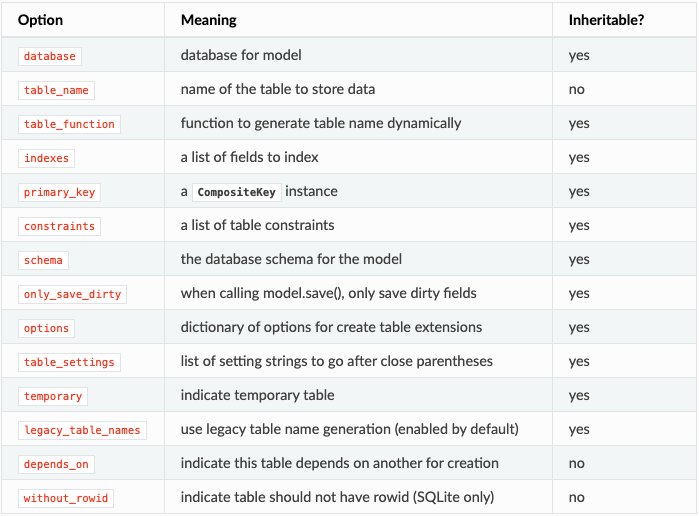

In [25]:
from peewee import SqliteDatabase

# SQLite database using WAL journal mode and 64MB cache.
sqlite_db = SqliteDatabase(database='app.db', timeout=5, pragmas={
    'automatic_index': 1,
    'index_info': 1,
    'journal_mode': 'wal',
    'cache_size': -1 * 6000,
    'foreign_keys': 1,
    'ignore_check_constraints': 0,
    'synchronous': 1,
    'table_info': 1})

sqlite_db.connect(reuse_if_open=True)


True

In [26]:

from peewee import Model, CompositeKey
from peewee import CharField, DateField, IntegerField

class Book(Model):
    """Simple model of a book"""
    title = CharField(max_length=255, null=False)
    author = CharField(null=False)
    edition = IntegerField(default=None)
    num_pages = IntegerField()
    publisher = CharField(max_length=255, null=False)
    genre = CharField(max_length=255, default=None)
    
    class Meta:
        """Book metadata"""
        database = sqlite_db
        primary_key = CompositeKey('title', 'author', 'edition')
        table_name = 'Book'

class Author(Model):
    """Simple model of author"""
    name = CharField(max_length=255, null=False)
    birthdate = DateField(formats='MM/DD/YYYY')
    pen_name = CharField(max_length=255, default=None)
    
    class Meta:
        """Author metadata"""
        database = sqlite_db
        primary_key = CompositeKey('name', 'birthdate')
        table_name = 'Author'
    
sqlite_db.create_tables(models=[Book])


## Sqlite Database Functions

pragma(key[, value=SENTINEL[, permanent=False ] ])<br><br>

Parameters<br>
• key – Setting name.<br>
• value – New value for the setting (optional).<br>
• permanent – Apply this pragma whenever a connection is opened.<br><br>

Execute a PRAGMA query once on the active connection. If a value is not specified, then the current value will be returned. If permanent is specified, then the PRAGMA query will also be executed whenever a new connection is opened, ensuring it is always in-effect.<br><br>

Note: Bydefaultthisonlyaffectsthecurrentconnection.IfthePRAGMAbeingexecutedisnotpersistent, then you must specify permanent=True to ensure the pragma is set on subsequent connections.

List of Pragma Options

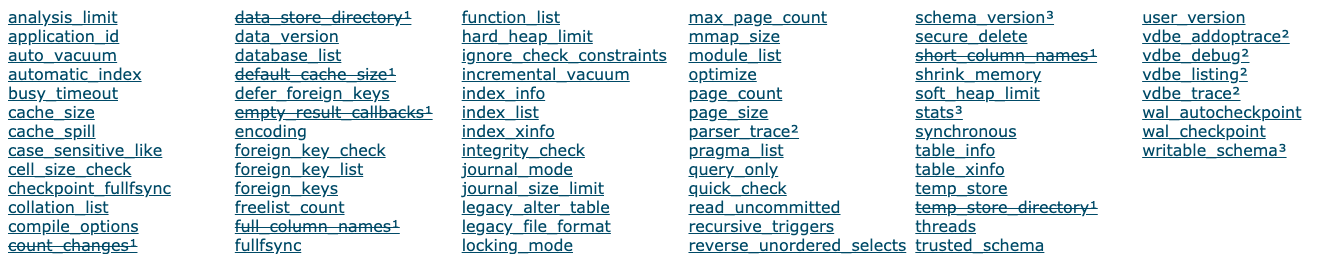

In [27]:

print(sqlite_db.pragma(key='automatic_index'))
print(sqlite_db.pragma(key='index_info'))
print(sqlite_db.pragma(key='journal_mode'))
print(sqlite_db.pragma(key='cache_size'))
print(sqlite_db.pragma(key='foreign_keys'))
print(sqlite_db.pragma(key='ignore_check_constraints'))
print(sqlite_db.pragma(key='synchronous'))
print(sqlite_db.pragma(key='table_info'))


1
None
wal
-6000
1
0
1
None


cache_size<br>
Get or set the cache_size pragma for the current connection.

In [28]:
print(sqlite_db.cache_size)

-6000


foreign_keys<br>
Get or set the foreign_keys pragma for the current connection.

In [29]:
print(sqlite_db.foreign_keys)

1


journal_mode<br>
Get or set the journal_mode pragma.

In [30]:
print(sqlite_db.journal_mode)

wal


journal_size_limit<br>
Get or set the journal_size_limit pragma.

In [31]:
print(sqlite_db.journal_size_limit)

-1


mmap_size<br>
Get or set the mmap_size pragma for the current connection.

In [32]:
print(sqlite_db.mmap_size)

0


page_size<br>
Get or set the page_size pragma.

In [33]:
print(sqlite_db.page_size)

4096


read_uncommitted<br>
Get or set the read_uncommitted pragma for the current connection.

In [34]:
print(sqlite_db.read_uncommitted)

0


synchronous<br>
Get or set the synchronous pragma for the current connection.

In [35]:
print(sqlite_db.synchronous)

1


wal_autocheckpoint<br>
Get or set the wal_autocheckpoint pragma for the current connection.

In [36]:
print(sqlite_db.wal_autocheckpoint)

1000


timeout<br>
Get or set the busy timeout (seconds).

In [37]:
print(sqlite_db.timeout)

5


register_aggregate(klass[, name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• klass – Class implementing aggregate API.<br>
• name (str) – Aggregate function name (defaults to name of class).<br>
• num_params(int)–Numberofparameterstheaggregateaccepts,or-1foranynumber.<br><br>

Register a user-defined aggregate function. The function will be registered each time a new connection is opened. Additionally, if a connection is already open, the aggregate will be registered with the open connection.

In [38]:
print(sqlite_db.register_aggregate(klass=Book, name='Book Func', num_params=0))

None


aggregate([name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• name (str) – Name of the aggregate (defaults to class name).<br>
• num_params(int) – Number of parameters the aggregate accepts, or -1 for any number.<br><br>

Class decorator to register a user-defined aggregate function.

In [39]:
@sqlite_db.aggregate
def func():
    pass

register_collation(fn[, name=None ])<br><br>

Parameters<br>
• fn – The collation function.<br>
• name (str) – Name of collation (defaults to function name)<br><br>

Register a user-defined collation. The collation will be registered each time a new connection is opened. Additionally, if a connection is already open, the collation will be registered with the open connection.

In [40]:
sqlite_db.register_collation(fn=collation_func)

NameError: name 'collation_func' is not defined

collation([name=None ])<br><br>

Parameters<br>
name (str) – Name of collation (defaults to function name) Decorator to register a user-defined collation.

In [41]:
@sqlite_db.collation
def collation_func():
    pass

register_function(fn[, name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• fn – The user-defined scalar function.<br>
• name (str) – Name of function (defaults to function name)<br>
• num_params (int) – Number of arguments the function accepts, or -1 for any number.<br><br>

Register a user-defined scalar function. The function will be registered each time a new connection is opened. Additionally, if a connection is already open, the function will be registered with the open con- nection.

In [42]:
sqlite_db.register_function(fn=func, name='Book function', num_params=0)

func([name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• name (str) – Name of the function (defaults to function name).<br>
• num_params (int) – Number of parameters the function accepts, or -1 for any number.<br><br>

Decorator to register a user-defined scalar function.

In [43]:
@sqlite_db.func
def function():
    pass

register_window_function(klass[, name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• klass – Class implementing window function API.<br>
• name (str) – Window function name (defaults to name of class).<br>
• num_params (int) – Number of parameters the function accepts, or -1 for any number.<br><br>

Register a user-defined window function.

In [44]:
sqlite_db.register_window_function(klass=Book, name='Book window function', num_params=0)

AttributeError: 'sqlite3.Connection' object has no attribute 'create_window_function'

window_function([name=None[, num_params=-1 ] ])<br><br>

Parameters<br>
• name (str) – Name of the window function (defaults to class name).<br>
• num_params (int) – Number of parameters the function accepts, or -1 for any number. Class decorator to register a user-defined window function. Window functions must define the following methods:<br><br>

• step(<params>) - receive values from a row and update state.<br>
• inverse(<params>) - inverse of step() for the given values.<br>
• value() - return the current value of the window function.<br>
• finalize() - return the final value of the window function.

In [45]:
@sqlite_db.window_function
def window_func():
    pass

table_function([name=None ])<br><br>

Class-decorator for registering a TableFunction. Table functions are user-defined functions that, rather than returning a single, scalar value, can return any number of rows of tabular data.

In [46]:
@sqlite_db.table_function
def table_func():
    pass

unregister_aggregate(name)<br><br>

Parameters<br>
name – Name of the user-defined aggregate function.<br><br>

Unregister the user-defined aggregate function.

In [47]:
sqlite_db.unregister_aggregate(name='func')

KeyError: 'func'

unregister_collation(name)<br><br>

Parameters<br>
name – Name of the user-defined collation.<br><br>

Unregister the user-defined collation.

In [ ]:
sqlite_db.unregister_collation(name='collation_func')

unregister_function(name)<br><br>

Parameters name – Name of the user-defined scalar function.<br><br>

Unregister the user-defined scalar function.

In [48]:
sqlite_db.unregister_function(name='func')

KeyError: 'func'

unregister_table_function(name)<br><br>

Parameters name – Name of the user-defined table function.<br><br>

Returns True or False, depending on whether the function was removed.<br><br>

Unregister the user-defined scalar function.

In [49]:
sqlite_db.unregister_aggregate(name='table_func')

KeyError: 'table_func'

load_extension(extension_module)<br>
Load the given C extension. If a connection is currently open in the calling thread, then the extension will be loaded for that connection as well as all subsequent connections.

In [50]:
sqlite_db.load_extension(extension=None)

TypeError: argument 1 must be str, not None

attach(filename, name)<br><br>

Parameters<br>
• filename (str) – Database to attach (or :memory: for in-memory)<br>
• name (str) – Schema name for attached database. Returns boolean indicating success<br><br>

Register another database file that will be attached to every database connection. If the main database is currently connected, the new database will be attached on the open connection.

In [51]:
sqlite_db.attach(filename='./people.db', name='Person')

True

transaction([lock_type=None ])<br><br>

Parameters<br>
lock_type (str) – Locking strategy: DEFERRED, IMMEDIATE, EXCLUSIVE.<br><br>

Create a transaction context-manager using the specified locking strategy (defaults to DEFERRED).

In [52]:
sqlite_db.transaction()